In [1]:
# Import necessary libraries
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from zipfile import ZipFile
from fastai.vision import * 
from fastai.vision import *
from fastai.metrics import error_rate
import matplotlib.pyplot as plt
# constants
path_img = 'images/data'
## Not used later
from PIL import Image

In [2]:
#Once
with ZipFile('images/data_2.zip', 'r') as zip: 
    zip.extractall('images')

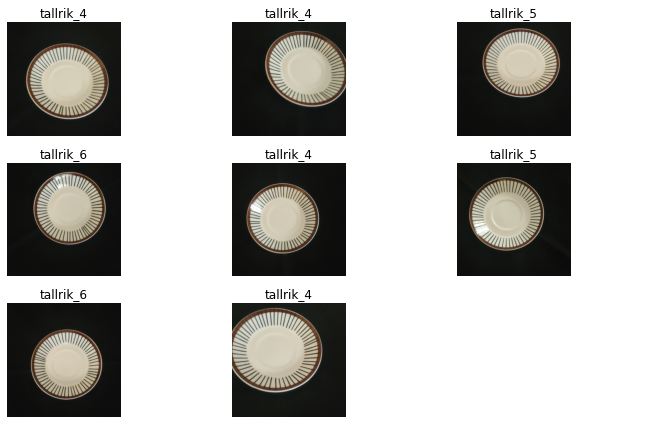

In [8]:
data = ImageDataBunch.from_folder(path_img, size=640, bs=8).normalize(imagenet_stats)
data.show_batch(rows=4, figsize=(10,6))

epoch,train_loss,valid_loss,error_rate,time
0,1.609954,1.242689,0.354167,00:19
1,0.859240,0.338824,0.135417,00:11
2,0.596726,0.316580,0.125000,00:11
3,0.389894,0.120505,0.041667,00:11
4,0.235416,0.091129,0.041667,00:11
5,0.182489,0.086931,0.062500,00:11
6,0.168804,0.273692,0.093750,00:11
7,0.152060,0.104876,0.041667,00:11
8,0.115081,0.222993,0.083333,00:11
9,0.109089,0.041376,0.020833,00:11


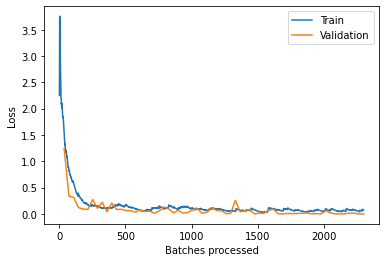

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.fit(64)
learn.recorder.plot_losses() 

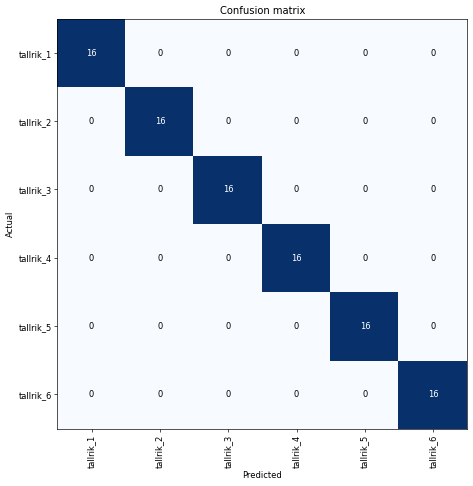

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

## Grad-Cam

In [ ]:
# from ClassificationIntepretation object. 
#interp = ClassificationInterpretation.from_learner(learn,ds_type = DatasetType.Valid)

gcam = GradCam.from_interp(learner,interp,image_idx) #image_idx from ds.valid_ds or ds.test_ds
gcam.plot() #plot both GradCam and GuidedBackprop. 
# You can also choose either one by passing parameters into plot function

In [12]:
from gradcam import *

ModuleNotFoundError: No module named 'gradcam'

In [11]:
img = Image.open(path_img+'/valid/tallrik_1/1586527524387-0001.png')
#img = open_image(path);
gcam = GradCam.from_one_img(learn,img)
gcam.plot()

NameError: name 'GradCam' is not defined

### Old remove below this point

In [ ]:
#data = ImageDataBunch.from_folder(path_img, ds_tfms=get_transforms(), size=360, bs=8).normalize(imagenet_stats)
data = ImageDataBunch.from_folder(path_img, size=360, bs=8).normalize(imagenet_stats)
#data = ImageDataBunch.from_folder(path_img, size=360, bs=8)
data.show_batch(rows=3, figsize=(7,6))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


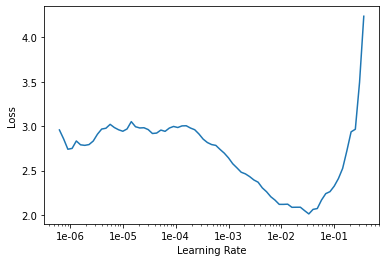

In [13]:
learn.lr_find()
learn.recorder.plot()

In [6]:
learn.fit

Type:        Learner
String form:
Learner(data=ImageDataBunch;
           
           Train: LabelList (288 items)
           x: ImageList
           Image (3, 360, 360),Image <...> False)
           (9): Linear(in_features=512, out_features=6, bias=True)
           )], add_time=True, silent=False)
File:        /opt/conda/lib/python3.7/site-packages/fastai/basic_train.py
Docstring:   Trainer for `model` using `data` to minimize `loss_func` with optimizer `opt_func`.


epoch,train_loss,valid_loss,error_rate,time
0,0.422020,0.272370,0.083333,00:04
1,0.237358,0.210442,0.114583,00:04


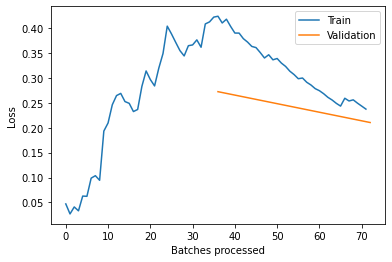

In [9]:
learn.fit(2,slice(None, 0.003, None))
learn.recorder.plot_losses() 

In [11]:
learn.save('stage-1-50')

In [8]:
print(data.classes)
len(data.classes),data.c

['tallrik_1', 'tallrik_2', 'tallrik_3', 'tallrik_4', 'tallrik_5', 'tallrik_6']


(6, 6)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


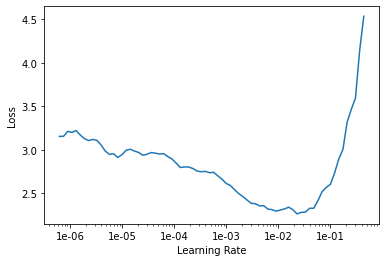

In [51]:
#learn.lr_find()
#learn.recorder.plot()

In [55]:
# learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,0.295494,0.083371,0.031250,00:05
1,0.387203,0.236546,0.093750,00:05
2,0.986403,4.119166,0.562500,00:05
3,1.120927,1.403216,0.343750,00:05
4,1.200906,0.548890,0.187500,00:05
5,1.025628,1.127393,0.322917,00:05
6,1.062199,0.855106,0.239583,00:05
7,0.925969,1.611590,0.343750,00:05
8,0.776636,0.593274,0.250000,00:05
9,0.754823,0.139648,0.062500,00:05


In [57]:
learn.save('stage-1-50')

In [58]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.141880,0.008249,0.000000,00:05
1,0.128275,0.004013,0.000000,00:05
2,0.120447,0.005649,0.000000,00:05


In [60]:
learn.load('stage-1-50');

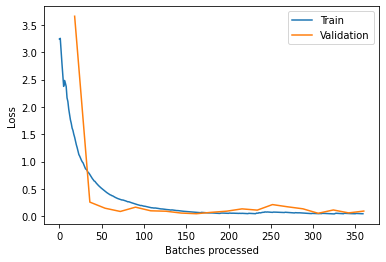

In [18]:
learn.recorder.plot_losses() 

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('tallrik_6', 'tallrik_5', 2)]

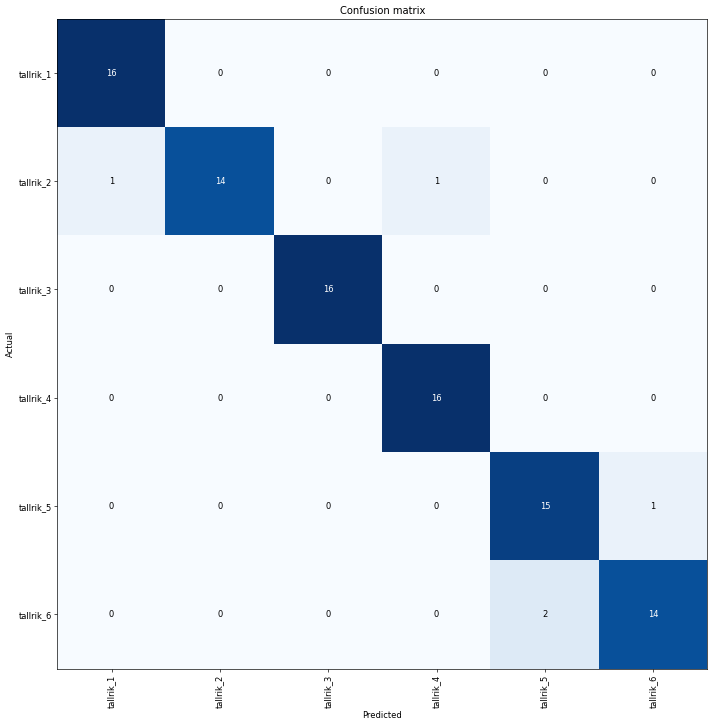

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)